# Swiggy Restaurant Data Analysis using Python

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [6]:
df = pd.read_csv(r"C:\Users\vaish\OneDrive\Desktop\ppp\swiggy.csv")
df.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


### Data Understanding

In [36]:
df.shape
df.columns
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


### Data Cleaning

In [37]:
# check missing values
df.isnull().sum()

# drop null values if any
df.dropna(inplace=True)

# rename columns
df.rename(columns={
    "Avg ratings": "Rating",
    "Total ratings": "Total_Ratings",
    "Delivery time": "Delivery_Time"
}, inplace=True)


### Exploratory Data Analysis (EDA)

##### Restaurants per City

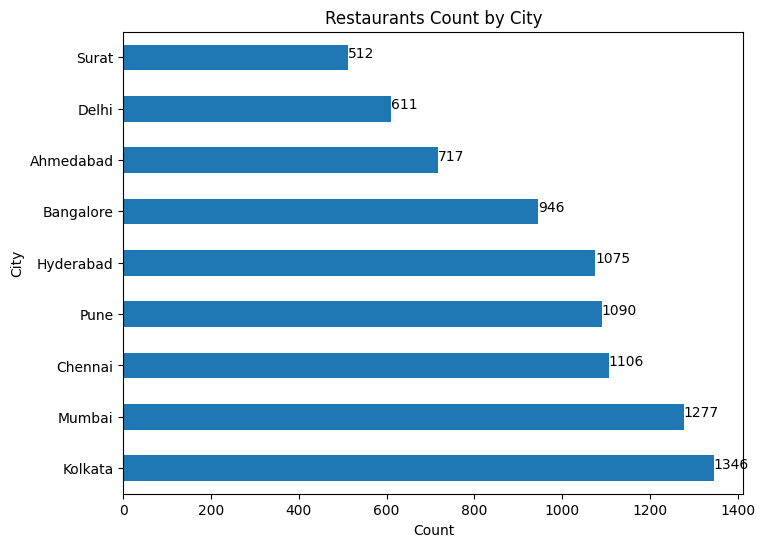

In [7]:
# Restaurants per City
city_count = df['City'].value_counts()

plt.figure(figsize=(8,6))
ax = city_count.plot(kind='barh')

plt.title("Restaurants Count by City")
plt.xlabel("Count")
plt.ylabel("City")

# Add total labels on bars
for index, value in enumerate(city_count):
    plt.text(value, index, str(value))

plt.show()


* Kolkata and Mumbai have the highest number of restaurants.

* Indicates strong food demand in these cities.

* Smaller cities show growth opportunity.

##### Top Food Categories

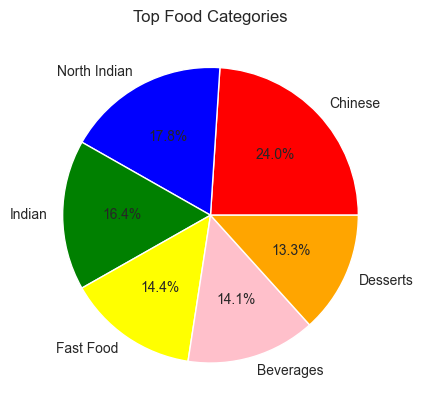

In [60]:
# Simple colored pie chart

food = df['Food type'].str.split(',', expand=True).stack().value_counts().head(6)

plt.pie(food, labels=food.index, autopct='%1.1f%%',
        colors=['red','blue','green','yellow','pink','orange'])

plt.title("Top Food Categories")
plt.show()


* Chinese and North Indian food are most popular.

* Fast food also has strong demand.

* Desserts have limited but steady preference.

##### Rating Distribution

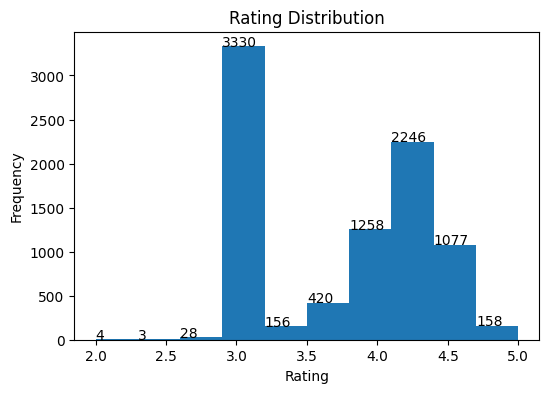

In [15]:
plt.figure(figsize=(6,4))

counts, bins, _ = plt.hist(df['Avg ratings'], bins=10)

for i in range(len(counts)):
    plt.text(bins[i], counts[i], int(counts[i]))

plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


* Most restaurants have ratings between 3.5 and 4.5.

* Shows overall good customer satisfaction.

* Very few restaurants have low ratings.

#####  Average Delivery Time by City

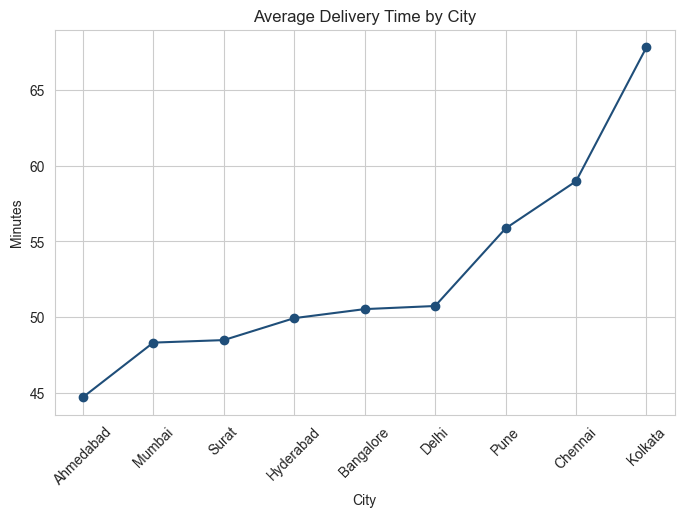

In [59]:
# Avg Delivery Time Trend

delivery = df.groupby('City')['Delivery_Time'].mean().sort_values()

plt.figure(figsize=(8,5))
plt.plot(delivery.index, delivery.values, marker='o')
plt.title("Average Delivery Time by City")
plt.xlabel("City")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.show()


* Delivery time is higher in metro cities.

* Some cities show faster delivery performance.

* Logistics improvement can increase satisfaction.

##### Top 10 Restaurants by Rating

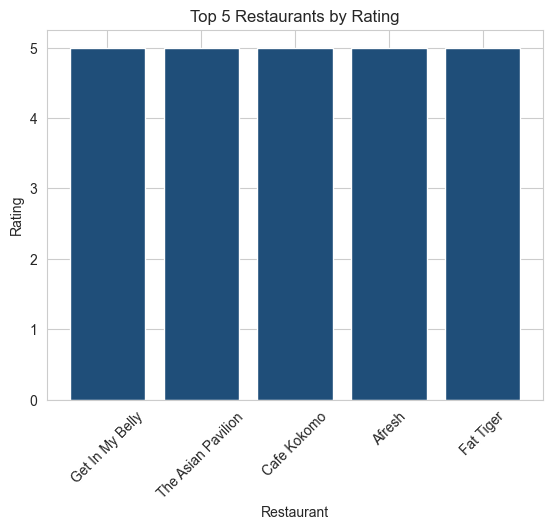

In [58]:
# Top 10 restaurants by rating

top_restaurants = df.sort_values('Rating', ascending=False).head(5)

plt.bar(top_restaurants['Restaurant'], top_restaurants['Rating'])

plt.title("Top 5 Restaurants by Rating")
plt.xlabel("Restaurant")
plt.ylabel("Rating")
plt.xticks(rotation=45)

plt.show()


* Top restaurants maintain high service quality.

* High ratings indicate strong customer trust.

* These restaurants lead in customer preference.

### 🔍 Key Business Insights


* Top food categories drive most restaurant demand.
* Highly rated restaurants attract more customers.
* Delivery time impacts customer satisfaction.
* Major cities contribute more to overall orders.
* Price range influences restaurant popularity.

### 💼 Business Implications


* Helps restaurants focus on high-demand cuisines.
* Supports improving delivery performance in slow areas.
* Useful for pricing and promotion strategies.
* Helps identify top-performing restaurants.
* Can support business decision-making and expansion.

### 🛠️ Tools & Technologies Used


* Python
* Pandas
* Matplotlib
* Jupyter Notebook
* Data Visualization